**데이터처리1_numpy4**

Numpy Array의 연산 (2)

* Boolean 배열
* Fancy Indexing
* 정렬

In [ ]:
import numpy as np

##1. Boolean 배열##

**1-1비교연산자 recap**

* 수치의 대소를 비교

        == : np.equal
        < : np.less
        > : np.greater
        != : np.not_equal
        <= : np.less_equal
        >= : np.greater_equal

* 연산의 결과값
        True, False

    -> Numpy 비교연산자도 Ufuncs로 구현하였음

In [ ]:
x = np.arange(6)
print(x)

[0 1 2 3 4 5]


In [ ]:
print(x<3)
print(x>3)
print(x<=3)
print(x>=3)
print(x!=3)
print(x==3)

[ True  True  True False False False]
[False False False False  True  True]
[ True  True  True  True False False]
[False False False  True  True  True]
[ True  True  True False  True  True]
[False False False  True False False]


In [ ]:
print(2*x)
print(x**2)
print((2*x)==(x**2))

[ 0  2  4  6  8 10]
[ 0  1  4  9 16 25]
[ True False  True False False False]


다차원 배열에서의 비교 연산

In [ ]:
rng = np.random.RandomState(0) #난수의 순서를 지정
x = rng.randint(10, size=(3,4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [ ]:
x<6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

**1-2 Boolean 배열의 활용**

-> 비교연산의 결과 Boolean 배열을 얻을 수 있음

In [ ]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [ ]:
print(np.count_nonzero(x<6)) #조건식을 만족시키는 값의 개수
print(np.sum(x<6)) 
print(np.sum(x<6, axis=1)) #행방향
print(np.sum(x<6, axis=0)) #열방향
print(np.any(x>8)) #조건식을 만족하는 값이 있는지 여부
print(np.any(x<0))
print(np.any(x>8, axis=1)) #행방향
print(np.any(x>8, axis=0)) #열방향
print(np.all(x<10)) #모든 값이 조건식을 만족하는지 여부
print(np.all(x==6))
print(np.all(x<8, axis=1)) #행방향
print(np.all(x<8, axis=0)) #열방향

8
8
[4 2 2]
[2 2 2 2]
True
False
[False  True False]
[False  True False False]
True
False
[ True False  True]
[ True False  True  True]


**1-3 boolean operation**

        & : np.bitwise_and
        | : np.bitwise_or
        ^ : np.bitwise_xor
        ~ : np.bitwise_not
    

In [ ]:
x = np.random.randint(10, size=(3,4))

In [ ]:
print(x)

[[1 3 7 5]
 [9 6 5 9]
 [2 0 6 1]]


In [ ]:
print(np.sum((x > 2) & (x < 6)))
print(np.sum(~( (x <= 1) | (x >= 7) )))

3
6


**1-4 Boolean 배열을 이용한 데이터 추출**

* Mask
    
    -> Boolean 배열을 이용하여 조건을 만족하는 데이터만 추리는 작업

In [ ]:
x

array([[1, 3, 7, 5],
       [9, 6, 5, 9],
       [2, 0, 6, 1]])

In [ ]:
x<5

array([[ True,  True, False, False],
       [False, False, False, False],
       [ True,  True, False,  True]])

In [ ]:
x[x<5]

array([1, 3, 2, 0, 1])

##2. Fancy Indexing##

**2-1 기존 Indexing과 Fancy Indexing**

난수 생성

In [ ]:
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


기존 인덱싱

In [ ]:
[x[3], x[7], x[2]]

[71, 86, 14]

Fancy Indexing

In [ ]:
ind = [3,7,4]
x[ind]

array([71, 86, 60])

**2-2 Fancy Indexing의 Shape**

인덱스 배열에 입력되는 shape에 따라 output의 shape도 결정됨

In [ ]:
ind = np.array([[3,7],[4,5]])
x[ind]

array([[71, 86],
       [60, 20]])

다차원 배열에서의 Fancy Indexing

In [ ]:
x = np.arange(12).reshape((3,4))
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
row = np.array([0,1,2])
col = np.array([2,1,3])
x[row, col]

array([ 2,  5, 11])

**2-3 Fancy Indexing의 활용**

In [ ]:
x

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [ ]:
x[2, [2,0,1]]

array([10,  8,  9])

In [ ]:
x[1:, [2,0,1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

예시 : 데이터 무작위로 고르기

In [ ]:
mean = [0,0]
cov = [[1,2],[2,5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

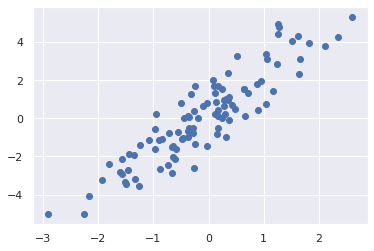

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

plt.scatter(X[:,0],X[:,1]);

In [ ]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([61, 89, 64, 77, 30, 43, 86, 39, 56, 85, 29, 21, 91, 70, 79, 94, 75,
       71, 69,  6])

In [ ]:
selection = X[indices]
selection.shape

(20, 2)

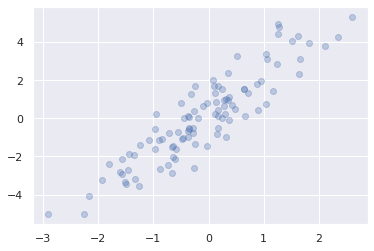

In [ ]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:,0], selection[:,1], facecolor='none', s=200);

##3. 정렬##

        np.sort : 배열 내의 값을 정렬
        np.argsort : 정렬된 인덱스를 반환
        

**3-1 정렬 함수**

In [ ]:
x = np.random.randint(10, size=(8))
x

array([3, 8, 0, 9, 6, 7, 8, 5])

In [ ]:
np.sort(x)

array([0, 3, 5, 6, 7, 8, 8, 9])

In [ ]:
np.argsort(x)

array([2, 0, 7, 4, 5, 1, 6, 3])

**3-2 다차원 배열의 정렬**

In [ ]:
rand = np.random.RandomState(42)
X = rand.randint(0,10,(4,6))
X

array([[6, 3, 7, 4, 6, 9],
       [2, 6, 7, 4, 3, 7],
       [7, 2, 5, 4, 1, 7],
       [5, 1, 4, 0, 9, 5]])

In [ ]:
np.sort(X, axis=0) #열방향 정렬

array([[2, 1, 4, 0, 1, 5],
       [5, 2, 5, 4, 3, 7],
       [6, 3, 7, 4, 6, 7],
       [7, 6, 7, 4, 9, 9]])

In [ ]:
np.sort(X, axis=1) #행방향 정렬

array([[3, 4, 6, 6, 7, 9],
       [2, 3, 4, 6, 7, 7],
       [1, 2, 4, 5, 7, 7],
       [0, 1, 4, 5, 5, 9]])